# Carregamento dos dados

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

caminho_dados = 'IDASE/25/dados'

fb = pd.read_csv(f"/content/drive/MyDrive/{caminho_dados}/fb_stock_prices_2018.csv", index_col='date', parse_dates=True)

terremotos = pd.read_csv(f"/content/drive/MyDrive/{caminho_dados}/earthquakes.csv")

covid = pd.read_csv(f"/content/drive/MyDrive/{caminho_dados}/covid19_cases.csv")
covid = covid.rename(columns={'dateRep': 'date'})
covid['date'] = covid['date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
covid = covid.set_index('date').replace('United_States_of_America', 'USA')
covid = covid.sort_index()['2020-01-18':'2020-09-18']

Mounted at /content/drive


# Representação Avançada de Variáveis Categóricas

A biblioteca *Seaborn* oferece diversas ferramentas úteis para visualização de dados categóricos:

* **Strip plots**: são gráficos que mostram os pontos individuais em uma linha ou em várias linhas, dependendo da quantidade de categorias. Cada ponto representa um valor numérico em cada categoria. Se houver muitos pontos, os pontos podem se sobrepor, tornando difícil distinguir a densidade de pontos em cada categoria.

* **Swarm plots**: são gráficos semelhantes aos strip plots, mas em vez de sobrepor pontos, ajusta os pontos ao longo do eixo da categoria, de modo que eles não se sobreponham. O swarm plot pode ser útil para identificar padrões em dados com muitos pontos ou com densidades de pontos diferentes entre as categorias.

* **Boxen plots**: são gráficos que mostram a distribuição dos dados em cada categoria, além de uma indicação da mediana, quartis e dos outliers. Eles são semelhantes aos box plots, mas são mais informativos, pois mostram a densidade dos dados em cada categoria.

* **Violin plots**: são gráficos que mostram a distribuição dos dados em cada categoria, além de uma indicação da mediana, quartis e dos outliers. Eles são semelhantes aos box plots, mas mostram a densidade dos dados em cada categoria em vez de uma caixa.


## Exemplo **stripplot()**:

- Gráfico de magnitude dos terremotos de acordo com o magType. A cor dos pontos será modulada pela coluna tsunami.

Text(0.5, 1.0, 'Magnitudes de terremotos na Indonésia para diversos magTypes')

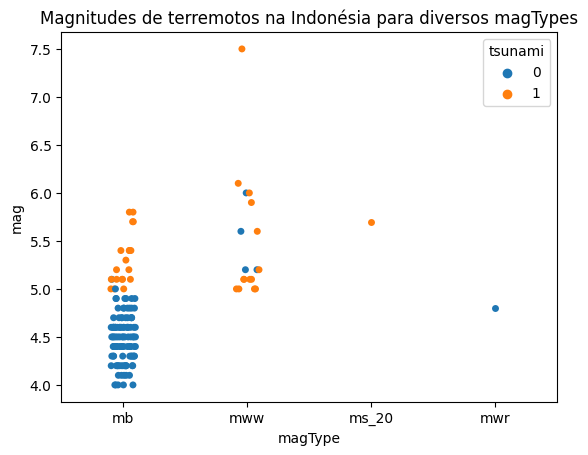

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=terremotos.query('parsed_place == "Indonesia"')
)

plt.title('Magnitudes de terremotos na Indonésia para diversos magTypes')

## Exemplo **swarmplot()**


<Axes: xlabel='magType', ylabel='mag'>

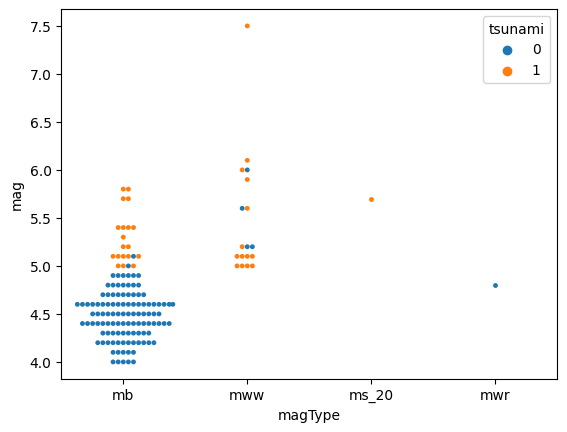

In [ ]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=terremotos.query('parsed_place == "Indonesia"'),
    size=3.5 # tamanho do ponto
)

## Exemplo **boxenplot()**

Boxenplots ou letter-value plots são úteis para resolver imprecisões do gráfico de caixas clássico quando há um grande conjunto de dados.

Maiores informações podem ser vistas [aqui](https://towardsdatascience.com/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97#:~:text=Boxenplots%20(or%20letter%2Dvalue%20plots,boxplots%20using%20a%20practical%20example).

Basicamente divide-se a distribuição em subgrupos menores, possibilitando uma melhor visualização, principalmente dos outliers.

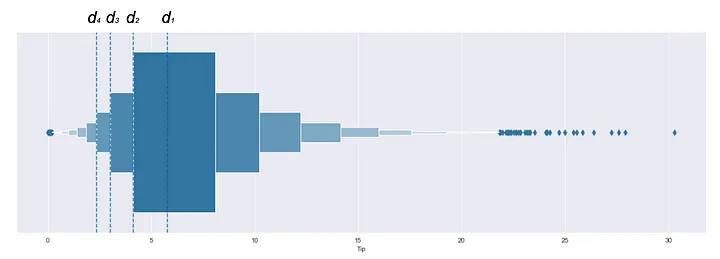

Fonte: [Letter Value Plot — The Easy to Understand Boxplot for Large Datasets](https://towardsdatascience.com/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97#:~:text=Boxenplots%20(or%20letter%2Dvalue%20plots,boxplots%20using%20a%20practical%20example)

Text(0.5, 1.0, 'Comparando a magnitude dos terremotos por tipo de magnitude (magType)')

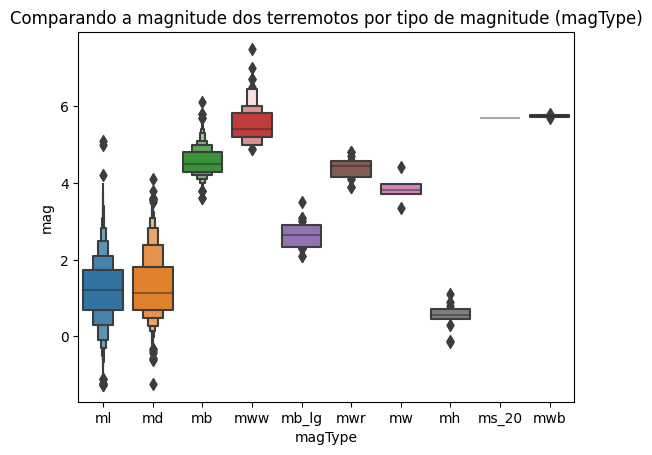

In [ ]:
sns.boxenplot(
    x='magType', y='mag', data=terremotos[['magType', 'mag']]
)
plt.title('Comparando a magnitude dos terremotos por tipo de magnitude (magType)')

## Exemplo Gráfico violino

Este gráfico é uma combinação da estimativa de densidade por kernel (KDE) com o boxplot

Text(0.5, 1.0, 'Comparando a magnitude dos terremotos por tipo de magnitude (magType)')

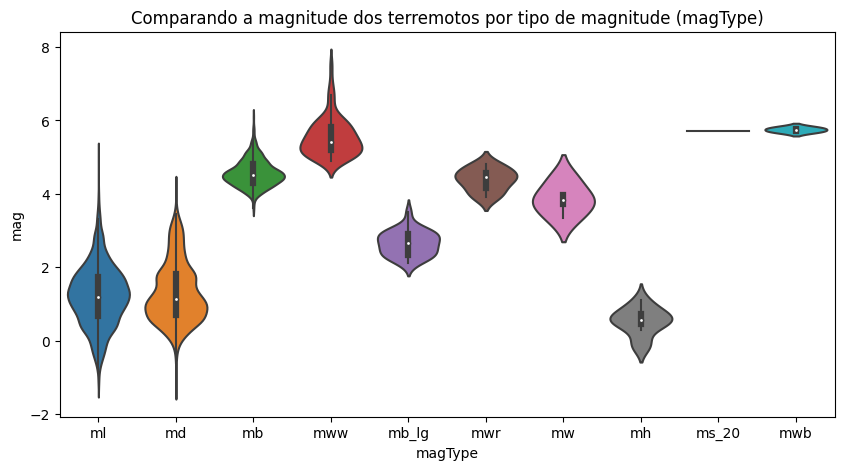

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=terremotos[['magType', 'mag']],  
    ax=axes, scale='width' # todos os violinos com a mesma largura
)
plt.title('Comparando a magnitude dos terremotos por tipo de magnitude (magType)')

# Representação Avançada de Correlações e Mapas de Calor

A biblioteca *Seaborn* oferece diversas ferramentas avançadas para visualização de correlações e mapas de calor:

* **Heatmaps**: gráfico que exibe uma matriz de dados em que cada célula é colorida de acordo com o valor que contém. É uma maneira eficiente de visualizar a matriz de correlação entre várias variáveis. O *heatmap* é útil para encontrar padrões e identificar quais variáveis têm forte correlação positiva ou negativa.

* **Pairplots**: gráfico de matriz que exibe as relações bivariadas entre as variáveis em um conjunto de dados. Ele cria um *scatterplot* de todas as combinações possíveis de variáveis numéricas em um conjunto de dados e um histograma para as variáveis categóricas. É uma maneira rápida de explorar a correlação entre todas as variáveis em um conjunto de dados.

* **Jointplots**: gráfico que exibe a distribuição bivariada de duas variáveis numéricas e a distribuição marginal de cada uma delas. O gráfico pode ser exibido como um *scatterplot*, *hexbinplot* ou um *kde*. O *jointplot* é útil para identificar se há uma relação entre duas variáveis numéricas e como a distribuição de cada variável se relaciona com a outra.


## Exemplo de mapa de calor para avaliar correlações entre dados das ações do Facebook

<Axes: >

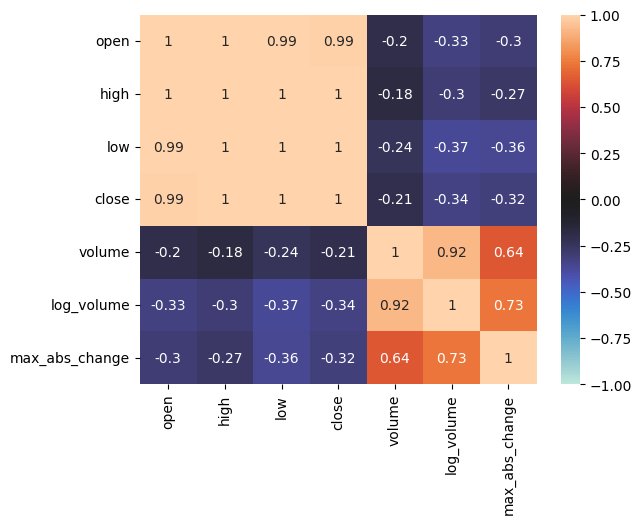

In [ ]:
import numpy as np

sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True, center=0, vmin=-1, vmax=1
)

## **Exemplo 1** **pairplot()**: usando os dados das ações do Facebook

Esta função é muito similar à matriz de dispersão do módulo plot da pandas. No entanto é ainda mais simples de se usar.


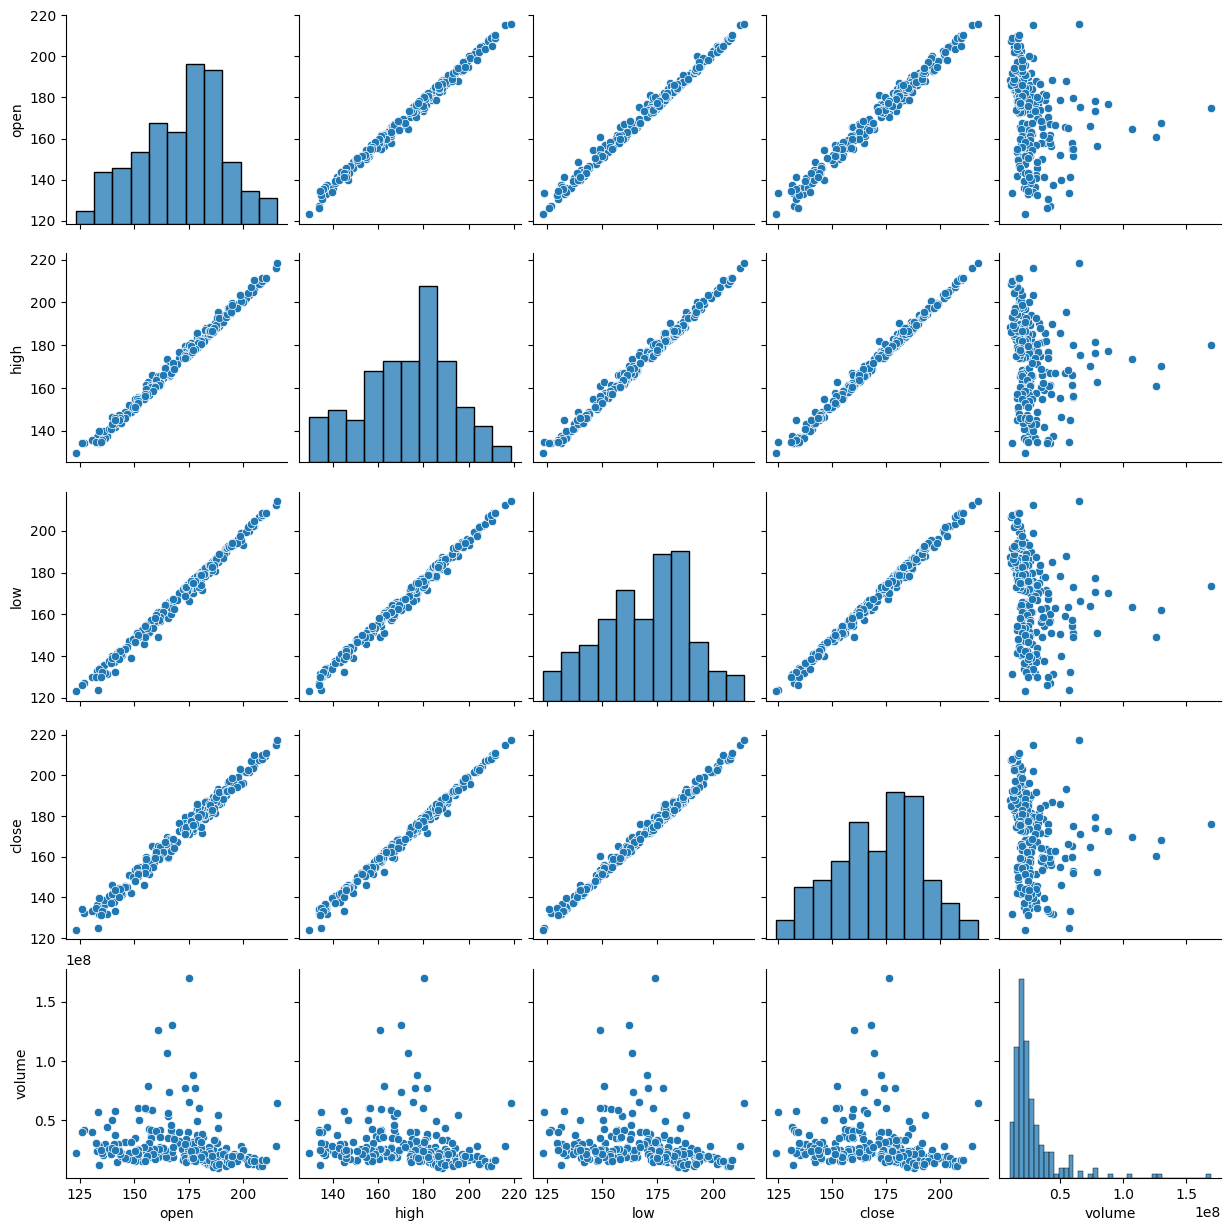

In [ ]:
sns.pairplot(fb)

## **Exemplo 2** **pairplot()**: separando os dados em trimestres

Evidenciando o comportamento trimestral da ação e mostrando a *kde* na diagonal da matriz.

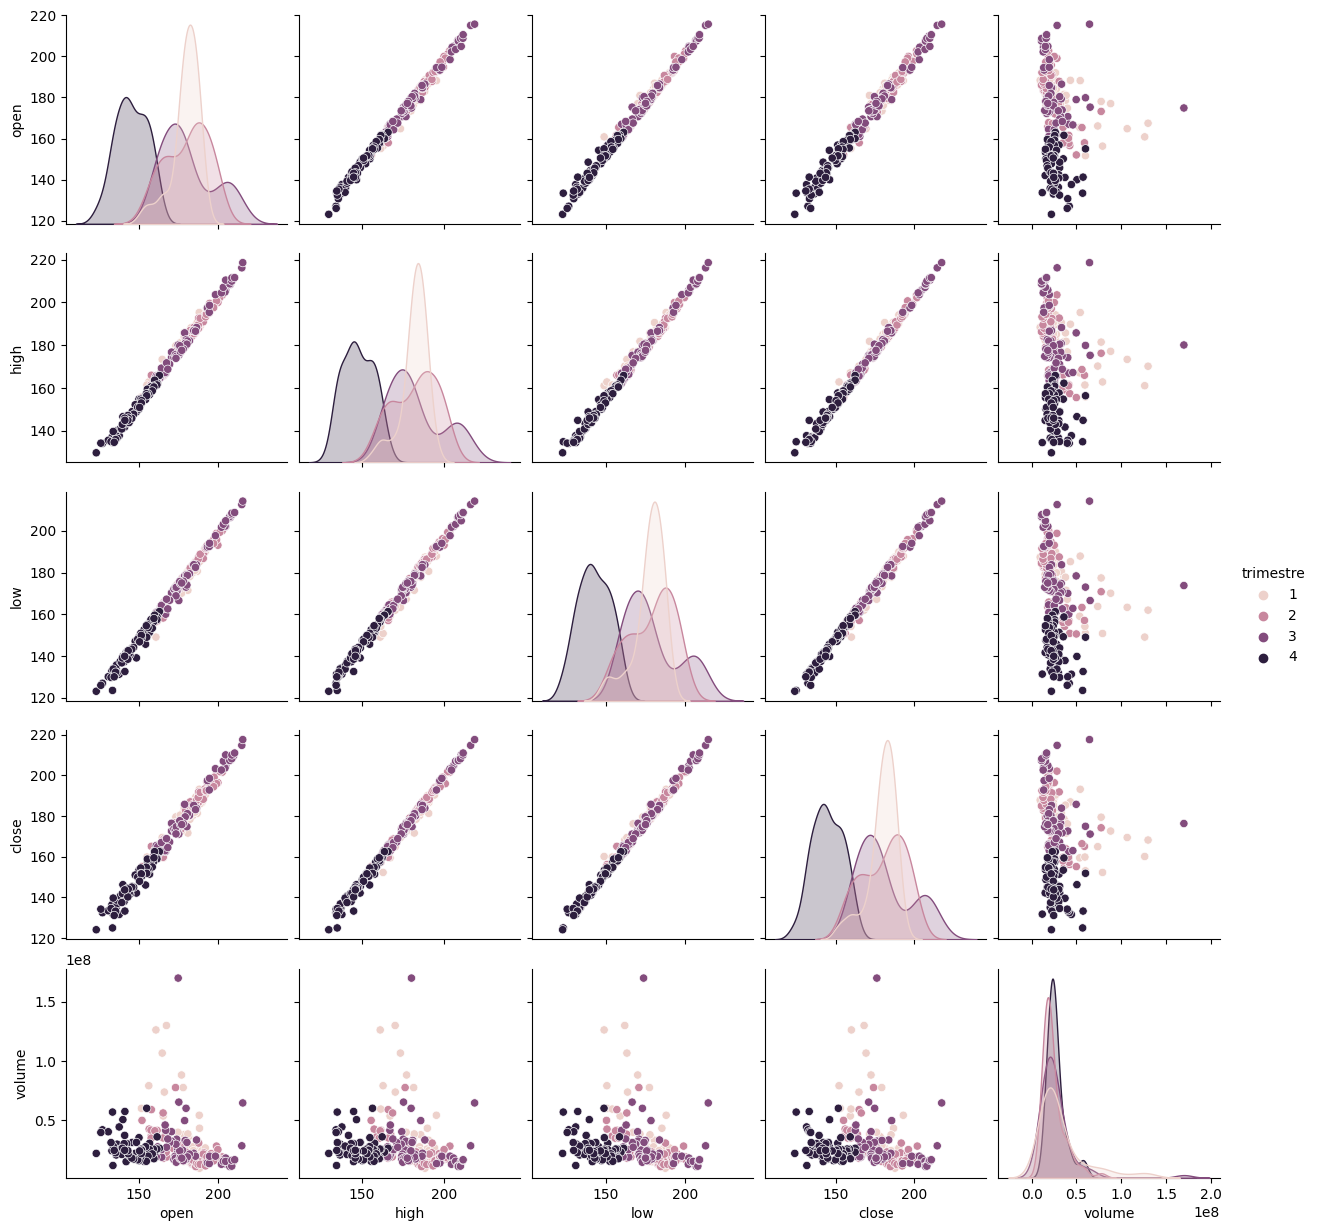

In [ ]:
sns.pairplot(
    fb.assign(trimestre=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='trimestre'
)


## **Exemplo jointplot()**: avaliando a relação entre a variação máxima diária e o log do volume

O jointplot() pode ser criado usando um gráfico de:

- Dispersão
- Hexbin
- KDE
- Regressão Linear
- Resíduos


<Figure size 640x480 with 0 Axes>

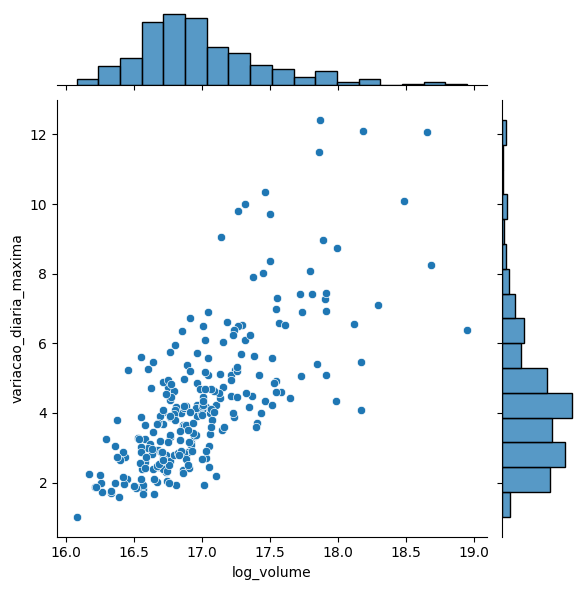

<Figure size 640x480 with 0 Axes>

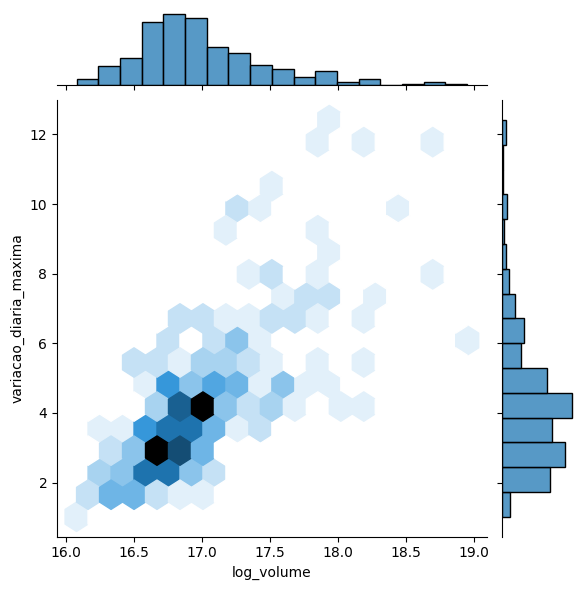

<Figure size 640x480 with 0 Axes>

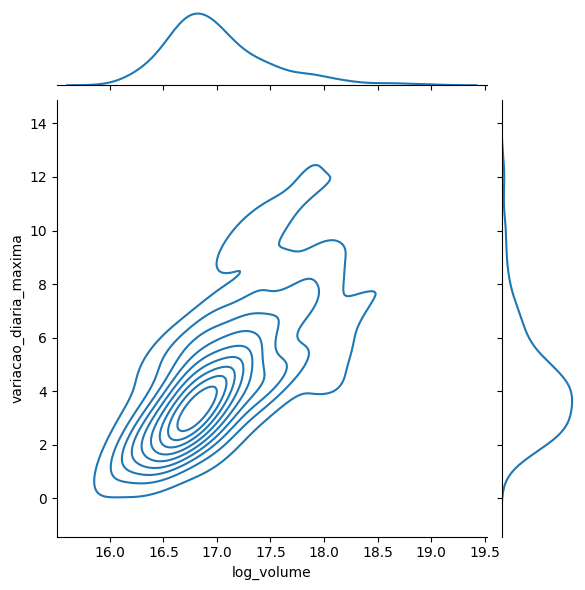

<Figure size 640x480 with 0 Axes>

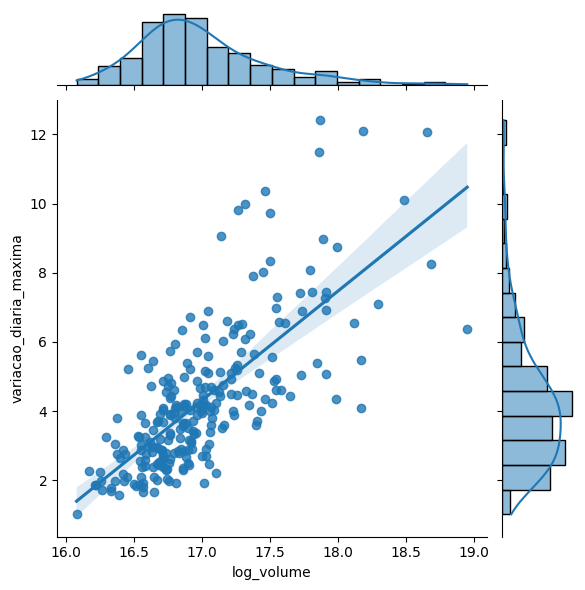

<Figure size 640x480 with 0 Axes>

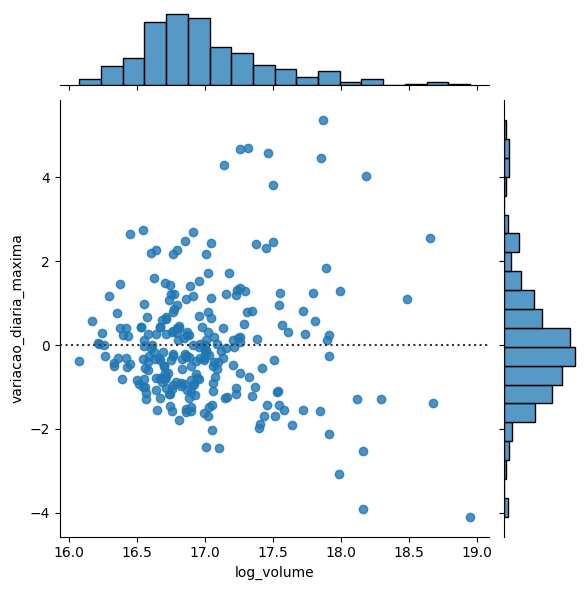

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
sns.jointplot(
    x='log_volume',
    y='variacao_diaria_maxima',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        variacao_diaria_maxima=fb.high - fb.low
    )
)
fig2 = plt.figure()

sns.jointplot(
    x='log_volume',
    y='variacao_diaria_maxima',
    kind = 'hex',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        variacao_diaria_maxima=fb.high - fb.low
    )
)

fig3 = plt.figure()

sns.jointplot(
    x='log_volume',
    y='variacao_diaria_maxima',
    kind = 'kde',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        variacao_diaria_maxima=fb.high - fb.low
    )
)

fig4 = plt.figure()

sns.jointplot(
    x='log_volume',
    y='variacao_diaria_maxima',
    kind = 'reg',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        variacao_diaria_maxima=fb.high - fb.low
    )
)

fig5 = plt.figure()

sns.jointplot(
    x='log_volume',
    y='variacao_diaria_maxima',
    kind = 'resid',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        variacao_diaria_maxima=fb.high - fb.low
    )
)